# Tracy Michaels - Assignment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import minmax_scale

***
# Question 1:
#### Calculating the mean, median, and mode of a given data set
***
> __Mean__ - the average of a data set; calculated by summing the all the values together dividing by the total number of values in the data set  
> __Median__ - The middle value of a data set  
> __Mode__ - Most common value represented in a data set  

__Given Data Set:__ BestBuy customer data table  
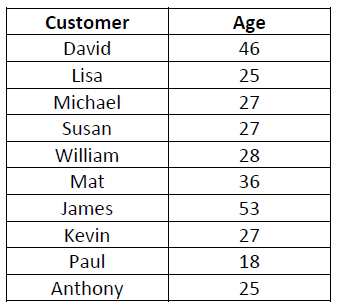



In [2]:
# create dataframe from table data
cust_data = {'Customer': ['David', 'Lisa', 'Michael', 'Susan', 'William', 'Mat', 'James', 'Kevin', 'Paul', 'Anthony'],\
        'Age': [46, 25, 27, 27, 28, 36, 53, 27, 18, 25]}
cust_df = pd.DataFrame(data=cust_data)
#display data frame
display(cust_df)

# feature to calculate values on
feat = cust_df['Age'].to_numpy()

# calculating the mean
# (sum of all ages)/number of ages
print('mean: ' + str(np.mean(feat)))

# calculating the median
# value that is in the middle of the data set
print('median: ' + str(np.median(feat)))

# calculating the mode
# value that appears most frequently
print('mode: ' + str(stats.mode(cust_df['Age'])[0][0]))

,Customer,Age
0,David,46
1,Lisa,25
2,Michael,27
3,Susan,27
4,William,28
5,Mat,36
6,James,53
7,Kevin,27
8,Paul,18
9,Anthony,25


mean: 31.2
median: 27.0
mode: 27


***
# Question 2:
#### Computing the five-number summary, identifying outliers, and visualising a given data set
***

__Given data set:__ Climate Data for Atlanta
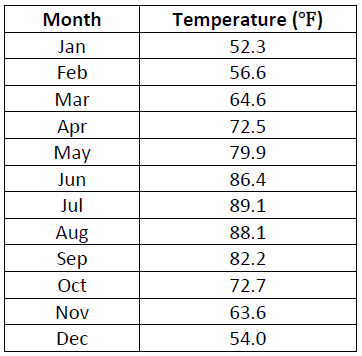

***
__Five-Number Summary:__
> __Minimum__ - this is the minimum value of a data set  
> __Q1 - First Quartile__ - this is the value that is at the 25% mark of a data set  
> __Median__ - The middle value of a data set  
> __Q3 - Third Quartile__ - this is the value that is at the 75% mark of a data set  
> __Maximum__ - this is the largest value of a data set  
***

__Finding Outliers:__ Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)
> To find any existing outliers, find the interquartile range (IQR) by subtracting Q3 from Q1.  This quantity is then multiplied by 1.5, which is then subtracted from Q1 and added to Q3.  If there are values that fall outside of this new range then they are to be considered an outlier.
***



__2.1) Computing the five-number summary:__

In [3]:
# create DataFrame of given values
temp_data = {'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],\
             'Temp': [52.3, 56.6, 64.6, 72.5, 79.9, 86.4, 89.1, 88.1, 82.2, 72.7, 63.6, 54.0]}
temp_df = pd.DataFrame(data=temp_data)
#display data frame
display(temp_df)

# calculate quartiles
quarts = np.percentile(temp_df['Temp'].to_numpy(), [25, 50, 75], interpolation='midpoint')

# calculate minimum and maximum
temp_min = temp_df['Temp'].min()
temp_max = temp_df['Temp'].max()

# display five-number summary
print('Five-number summary:')
print('Minimum: ' + str(temp_min))
print('Q1: ' + str(quarts[0]))
print('Median: ' + str(quarts[1]))
print('Q3: ' + str(quarts[2]))
print('Maximum: ' + str(temp_max))
print()

# calculating IQR
iqr = quarts[2] - quarts[0]
print('IQR: ' + str(iqr))

# determining outliers
iqr_e = 1.5 * iqr
out_min = quarts[0] - iqr_e
out_max = quarts[2] + iqr_e
print('Outliers: ')
for i in temp_df['Temp']:
    if(out_min > i or i > out_max):
        display(temp_df.loc[temp_df['Temp'] == i])
    

,Month,Temp
0,Jan,52.3
1,Feb,56.6
2,Mar,64.6
3,Apr,72.5
4,May,79.9
5,Jun,86.4
6,Jul,89.1
7,Aug,88.1
8,Sept,82.2
9,Oct,72.7


Five-number summary:
Minimum: 52.3
Q1: 60.1
Median: 72.6
Q3: 84.30000000000001
Maximum: 89.1

IQR: 24.20000000000001
Outliers: 


***
__2.2) Determining if there are outliers:__
> As there were no outputs from the above determining outliers function there are no outliers, this can be confirmed as there are no values in the dataset that fall out side the range \[(Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)\]
***

__2.3) Visualizing Data:__

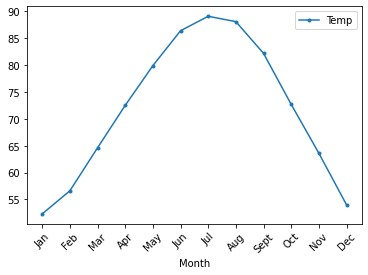

In [4]:
# displaying plot of data set
ax = plt.gca()
temp_df.plot(kind='line', x='Month', y='Temp', ax=ax, marker='.')
plt.xticks([x for x in range(len(temp_df['Month']))], temp_df['Month'].tolist(), rotation=45)
plt.show()

***
> Based on this visualization, it is clear to see that the temperature is higher in the middle months
***

# Question 3:
***
#### Given the following table of customer information
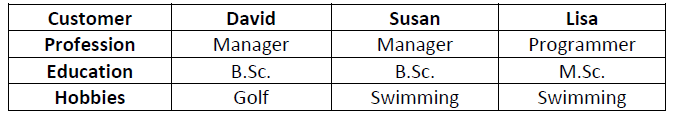

__3.1) Types of attibutes in chart:__  
> - Profession - Categorical - Nominal  
> - Education - Categorical - Ordinal  
> - Hobbies - Categorical - Nominal

__3.2) Computing the similarity values between "David" and "Susan":__  
> - using Simple matching:
> - To calculate the similarity the number of attibutes that both customers have in common will be divided by the total number of attibutes.  
> - in this case David and Susan both have the same profession and education, while their hobbies differ  
> - therefore their similarity is said to be 2/3  

__3.3) Computing the similarity values between "Susan" and "Lisa":__  
> - using the same method as in 3.2, Susan and Lisa have the same Hobbies, but their Profession and Education differ
> - therefore their similarity is said to be 1/3
***


# Question 4:
***
#### Given the following table of patient information:
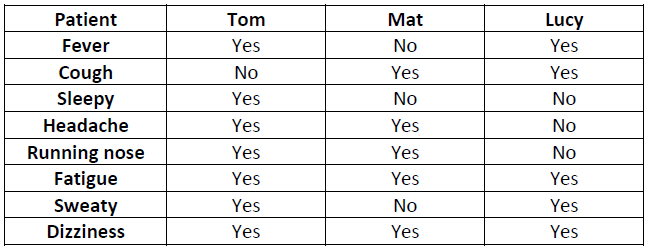 

__4.1) Types of attributes in table:__  
> - All attributes are binary  

__4.2) Computing the similarity values between "Tom" and "Mat"__
> - Using Jaccard: to compute the similarity, the attributes which are mutually absent are discarded and all others are given equal weight for matches and non-matches  
> - in the case of Tom and Mat they have 0 mutual absences, 4 matches, and 4 non-matches  
> - using the formula (matches)/(non-matches + matches) = 4/8 = 1/2  
> - therefore Tom and Mat have a similarity of 1/2

__4.3) Computing the similarity values between "Mat" and "Lucy"__
> - using the above method:
> - 1 mutual absences, 3 matches, 4 non-matches
> - discarding the mutual absence, (3 matches)/(4 non-matches + 3 matches) = 3/7
> - Therefore Mat and Lucy have a similarity of 3/7



# Question 5:
***
#### Given the following table of Fisher's iris data:
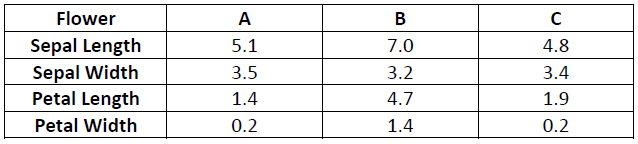

In [5]:
# turn table into dataframe
iris_data = {'Flower': ['A', 'B', 'C',],\
             'Sepal Length': [5.1, 7.0, 4.8],\
             'Sepal Width': [3.5, 3.2, 3.4],\
             'Petal Length': [3.5, 3.2, 3.4],\
             'Petal Width': [3.5, 3.2, 3.4]}

iris_df = pd.DataFrame(data=iris_data)
iris_df.set_index('Flower', inplace=True)
display(iris_df)

,Sepal Length,Sepal Width,Petal Length,Petal Width
Flower,,,,
A,5.1,3.5,3.5,3.5
B,7.0,3.2,3.2,3.2
C,4.8,3.4,3.4,3.4


__5.1) Types of attributes in table:__  
> - Attributes are numeric type

__5.2) Type of similarity measure chosen:__  
> - Euclidean distance = $\sqrt{(x_{i,1}-x_{j,1})^{2}+(x_{i,2}-x_{j,2})^{2}+...+(x_{i,p}-x_{j,p})^{2}}$  

__5.3) Computing the similarity values between "A" and "B":__



In [6]:
A = iris_df.loc['A'].to_numpy()
B = iris_df.loc['B'].to_numpy()
print(f'Euclidean distance = {euclidean(A, B)}')

Euclidean distance = 1.9697715603592212


__5.4) Computing the similarity values between "B" and "C":__


In [7]:
B = iris_df.loc['B'].to_numpy()
C = iris_df.loc['C'].to_numpy()
print(f'Euclidean distance = {euclidean(B, C)}')

Euclidean distance = 2.227105745132009


***

# Question 6:
***
#### Given the following table of Customer information data and ranking options:
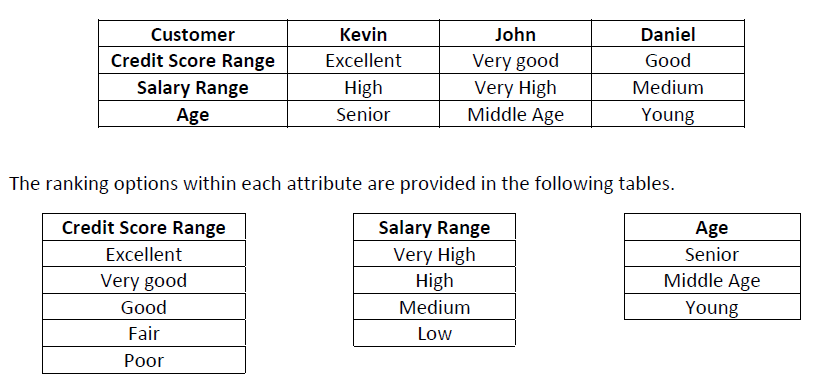

__6.1) Tpyes of attributes in table:__
> - Ordinal     

__6.2) Compute the similarity values between "Kevin" and "John":__
> - First finding the numeric ranks of each attribute using the following formula:  




> 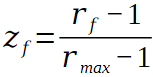

> __Credit Score__ = \[1, 0.75, 0.50, 0.25, 0\]   
> __Salary Range__ = \[1, 0.67, 0.33, 0\]  
> __Age__          = \[1, 0.50, 0\]  

> - mapping new values to customer table (will use a DataFrame for this):

In [8]:
cust_data2 = {'Customer': ['Kevin', 'John', 'Daniel'],\
              'Credit Score Range': [1, 0.75, 0.50],\
              'Salary Range': [0.67, 1, 0.33],\
              'Age': [1, 0.50, 0]}
cust_df2 = pd.DataFrame(data=cust_data2)
cust_df2.set_index('Customer', inplace=True)
display(cust_df2)


,Credit Score Range,Salary Range,Age
Customer,,,
Kevin,1.00,0.67,1.0
John,0.75,1.00,0.5
Daniel,0.50,0.33,0.0


> - computing the Euclidean between Kevin and John:

In [9]:
K = cust_df2.loc['Kevin'].to_numpy()
J = cust_df2.loc['John'].to_numpy()
print(f'Euclidean distance = {euclidean(K, J)}')

Euclidean distance = 0.6491532946846993


__6.3) Computing the similarity values between "John" and "Daniel":__
> - using the same method in 6.3:

In [10]:
J = cust_df2.loc['John'].to_numpy()
D = cust_df2.loc['Daniel'].to_numpy()
print(f'Euclidean distance = {euclidean(J, D)}')

Euclidean distance = 0.8725823743349391


***
# Question 7:
#### Normalizing the following dataset using the min-max normalization method to range \[0, 1\]:
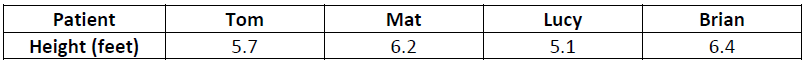

__Formula for min-max normalization:__

> 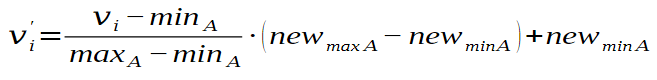  

__converting table to DataFrame:__

In [11]:
pat_data = {'Patient': ['Tom', 'Mat', 'Lucy', 'Brian'],\
            'Height (feet)': [5.7, 6.2, 5.1, 6.4]}
pat_df = pd.DataFrame(data=pat_data)
display(pat_df)

,Patient,Height (feet)
0,Tom,5.7
1,Mat,6.2
2,Lucy,5.1
3,Brian,6.4


__Normalizing Data:__

In [12]:
# get feature to normalize
h_arr = pat_df['Height (feet)'].to_numpy()

# normalize feature
h_arr_norm = minmax_scale(h_arr)

# insert into dataframe
pat_df['Height (norm)'] = h_arr_norm
display(pat_df)


,Patient,Height (feet),Height (norm)
0,Tom,5.7,0.461538
1,Mat,6.2,0.846154
2,Lucy,5.1,0.000000
3,Brian,6.4,1.000000
